# Preamble

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from scipy.optimize import minimize
from sklearn.metrics import classification_report, accuracy_score
%matplotlib inline

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving 2classes.csv to 2classes.csv


# Implementation

## 1. Split the dataset into train and test (70-30)

In [ ]:
input_df=pd.read_csv("2classes.csv", index_col=0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(input_df.iloc[:,:-1], input_df.iloc[:,-1], test_size = 0.3, random_state = 4)

## 2. Train SVM with linear and RBF kernels

In [ ]:
X = input_df.iloc[:,:-1]
y = input_df.iloc[:,-1]

In [ ]:
# soft-margin SVM with linear kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [ ]:
# soft-margin SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', C=1)
svm_rbf.fit(X_train, y_train)

SVC(C=1)

## 3. Plot decision boundaries

In [ ]:
def plot_decision_boundary(kernel, C):

  svm = SVC(kernel=kernel, C=C)
  svm.fit(X, y)

  plt.scatter(input_df.loc[:,'INCOME'],
              input_df.loc[:,'CREDIT_SCORE'],
              color = ["green" if val=='APPROVED' else "red" for val in input_df['APPLICATION']])


  # plot decision boundary

  x_min, x_max = input_df.loc[:,'INCOME'].min() - 1, input_df.loc[:,'INCOME'].max() + 1
  y_min, y_max = input_df.loc[:,'CREDIT_SCORE'].min() - 1, input_df.loc[:,'CREDIT_SCORE'].max() + 1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  Z = svm.decision_function(np.c_[xx.ravel(),yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 5), alpha = 0.4, cmap = plt.cm.Paired)
  plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k')

  plt.xlabel('Income')
  plt.ylabel('Credit Score')
  plt.title(f"{kernel} kernel with C={C}")

  plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


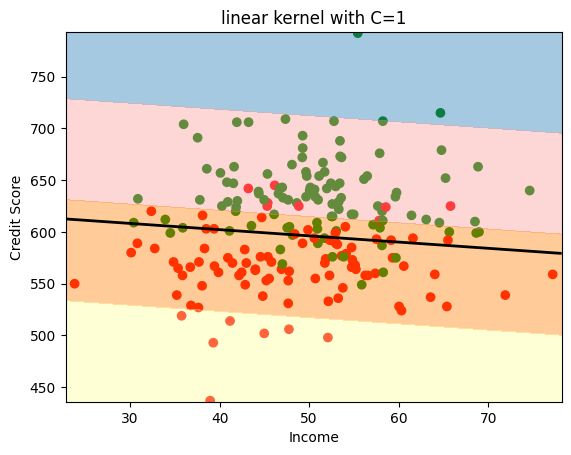

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


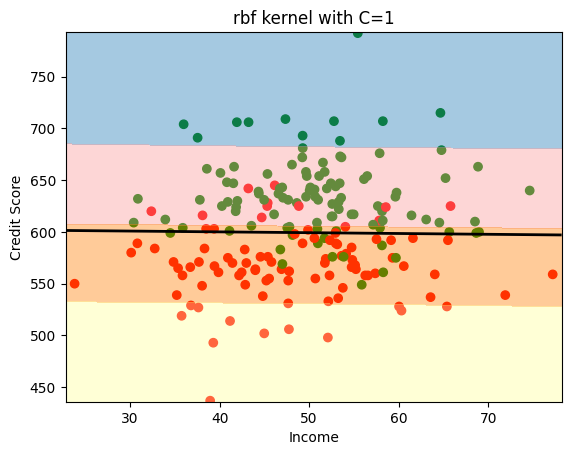

In [ ]:
plot_decision_boundary("linear", 1)
plot_decision_boundary("rbf", 1)

## 4. Evaluate the classifiers

In [ ]:
# predictions
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_linear))

              precision    recall  f1-score   support

    APPROVED       0.81      0.91      0.85        32
    REJECTED       0.88      0.75      0.81        28

    accuracy                           0.83        60
   macro avg       0.84      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60



In [ ]:
print(classification_report(y_test,y_pred_rbf))

              precision    recall  f1-score   support

    APPROVED       0.83      0.91      0.87        32
    REJECTED       0.88      0.79      0.83        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



# Insighting

## 1. Compare the performance of the kernels

Since the data are nonlinearly separable, the linear kernel was not ideal for the decision boundaries. The RBF kernel was better suited to classify the data because it can handle nonlinear and overlapping data.

Based on our classification metrics, the RBF kernel outperforms the linear kernel in almost all metrics. Of note is the difference in F1-scores. The tables above therefore confirm that the RBF kernel is better suited to separate the classes for this data set.

## 2. How does the choice of kernel affect the SVM's ability to classify the data accurately?

In our case, a linear kernel may not accurately or effectively separate the classes because the data are not linearly separable.

Meanwhile, as we learned, the RBF kernel is effective for nonlinearly separable data by mapping the data into a higher-dimensional space and allowing the SVM to find a decision boundary.

Therefore, for this set of data, the RBF kernel may be ideal over the linear kernel for a more accurate classification of data.

## 3. Experiment with the hyperparameter C

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


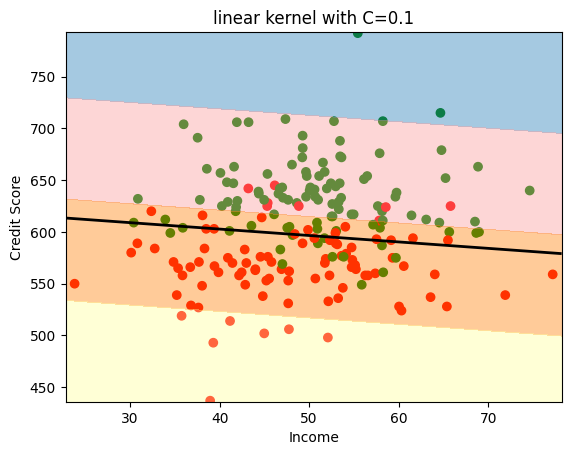

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


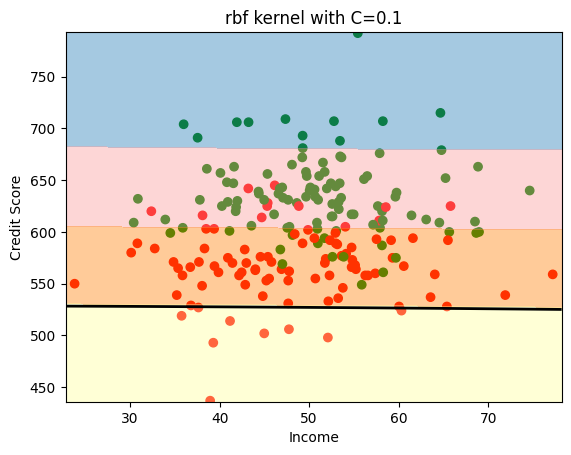

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


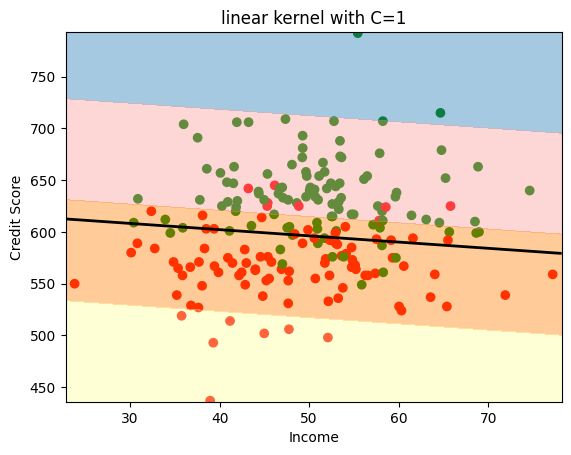

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


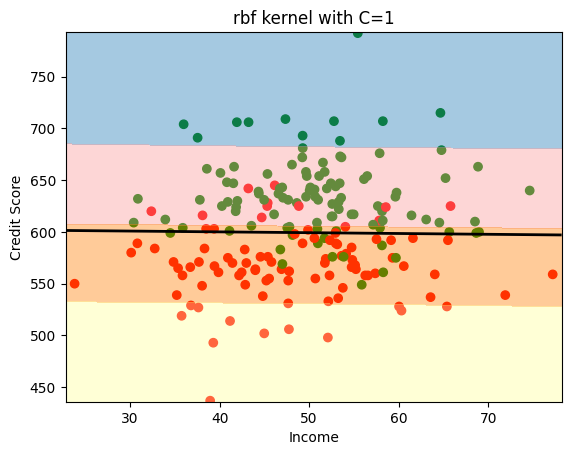

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


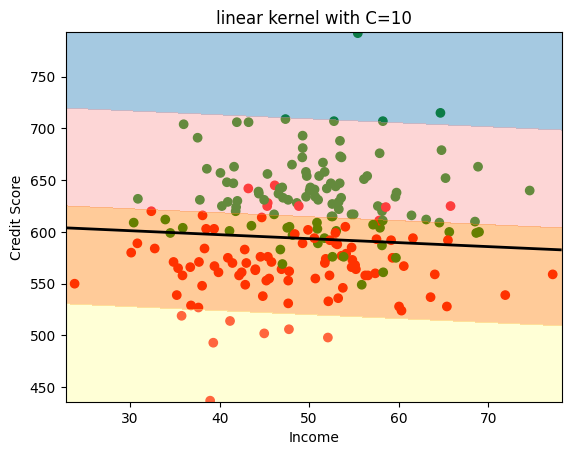

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


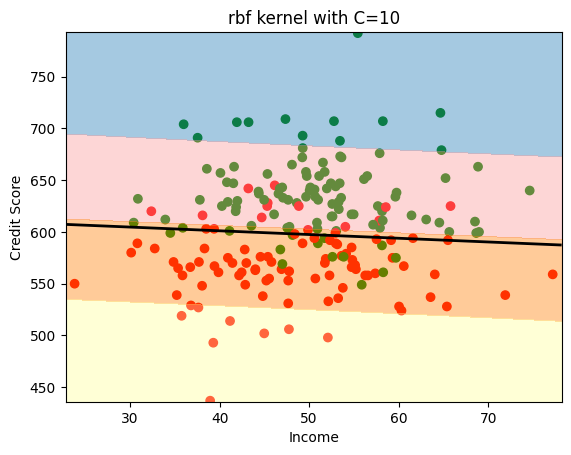

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


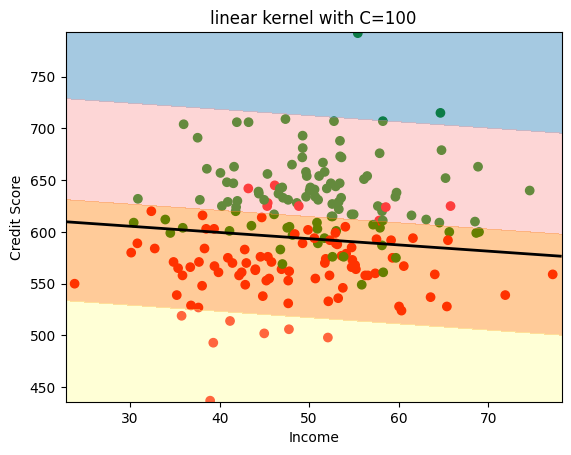

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


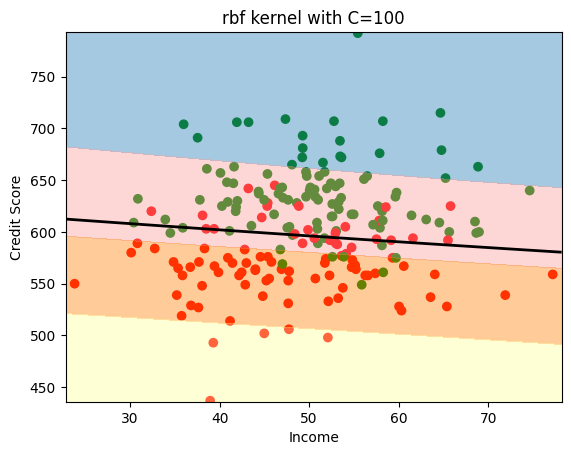

In [ ]:
for C_value in [0.1, 1, 10, 100]:
    plot_decision_boundary("linear", C_value)
    plot_decision_boundary("rbf", C_value)

A smaller value of C allows for a larger margin. Observably, there are more misclassified points in the training data when a smaller value of C is given (see rbf kernel, C=1)because there is less emphasis put on minimizing misclassification errors.

Increasing the value of C creates a narrower margin because larger C-values function to minimize the training error.

Overall, a smaller C-value may work well for data sets with overlapping classes, but may risk underfitting when the data are well-separated. A larger C-value, though it functions to minimize misclassification, may not accurately classify new data because it may overfit on the training data.